## Plotting univariate histograms

## Histogram

#### A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar:

In [7]:
import numpy as np
import seaborn as sb
import pandas as pd
from matplotlib import pyplot as plt
sb.set_theme(style='darkgrid')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


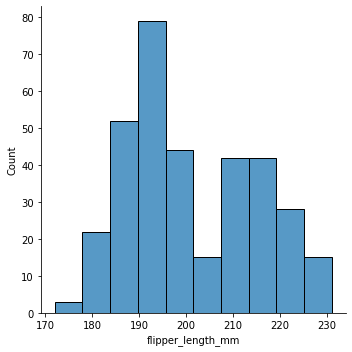

In [4]:
penguins = sb.load_dataset("penguins")
sb.displot(penguins, x="flipper_length_mm")
penguins.head()

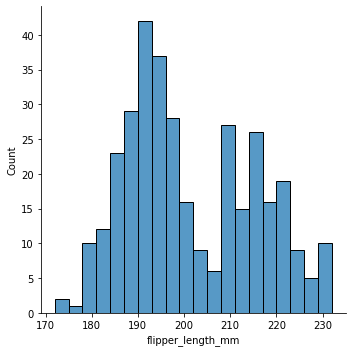

In [5]:
sb.displot(penguins, x="flipper_length_mm", binwidth=3)

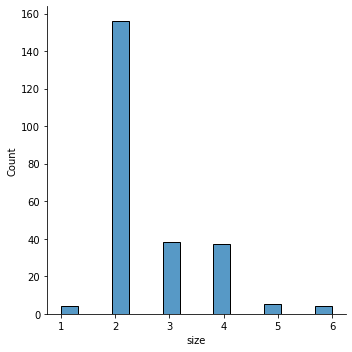

In [7]:
tips = sb.load_dataset("tips")
sb.displot(tips, x="size")

#### It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. Discrete bins are automatically set for categorical variables, but it may also be helpful to “shrink” the bars slightly to emphasize the categorical nature of the axis:

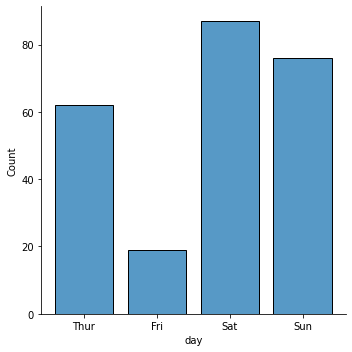

In [8]:
sb.displot(tips, x="day", shrink=.8)

###  Conditioning on other variables

#### Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset.

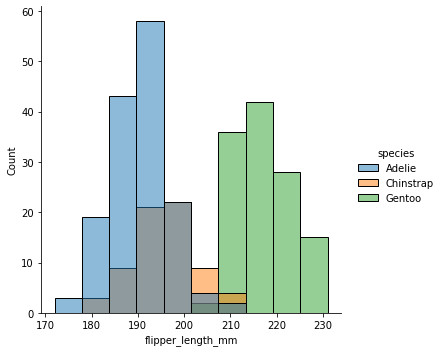

In [9]:
sb.displot(penguins, x="flipper_length_mm", hue="species")

#### By default, the different histograms are “layered” on top of each other and, in some cases, they may be difficult to distinguish

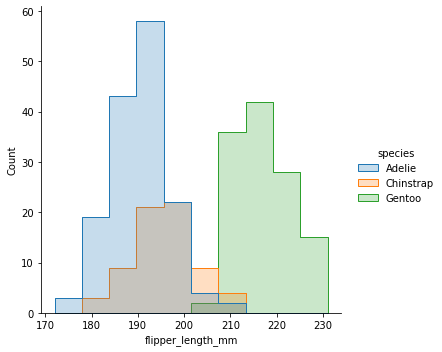

In [10]:
sb.displot(penguins, x="flipper_length_mm", hue="species", element="step")

###  instead of layering each bar, they can be “stacked”, or moved vertically.

### instead of layering each bar, they can be “stacked”, or moved vertically.

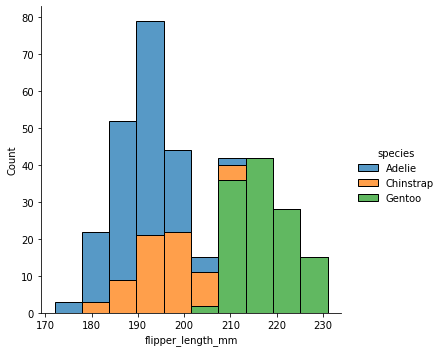

In [11]:
sb.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

###  Drawing of Subplot

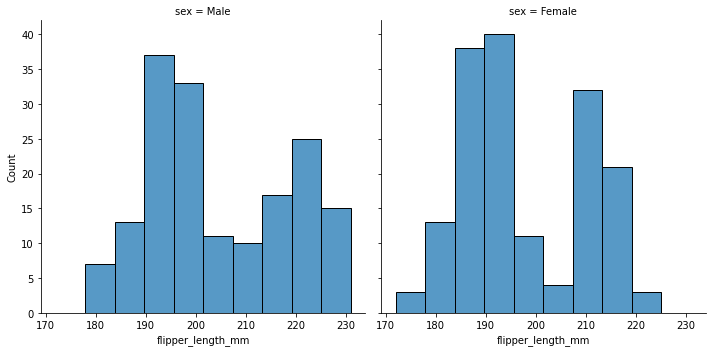

In [12]:
sb.displot(penguins, x="flipper_length_mm", col="sex", multiple="dodge")

### Normalized histogram statistics
#### Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to normalize the counts using the stat parameter:

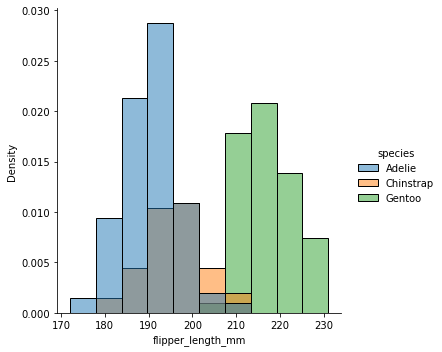

In [13]:
sb.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

# Kernel density estimation

#### A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


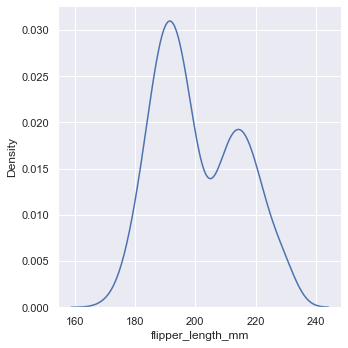

In [8]:
penguins = sb.load_dataset("penguins")
sb.displot(penguins, x="flipper_length_mm", kind="kde")
penguins.head(5)

### Choosing the smoothing bandwidth

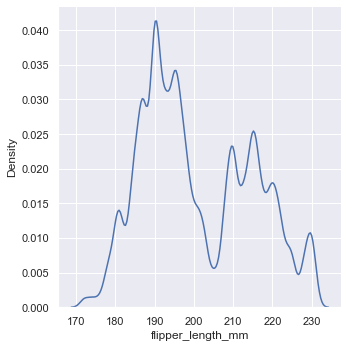

In [10]:
sb.displot(penguins,x="flipper_length_mm",kind="kde",bw_adjust=.25)

# Conditioning on other variables
#### As with histograms, if you assign a hue variable, a separate density estimate will be computed for each level of that variable:

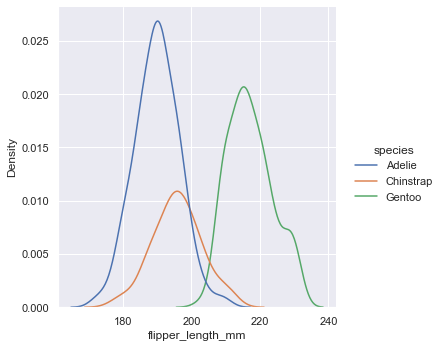

In [11]:
sb.displot(penguins,x="flipper_length_mm",hue="species",kind="kde")

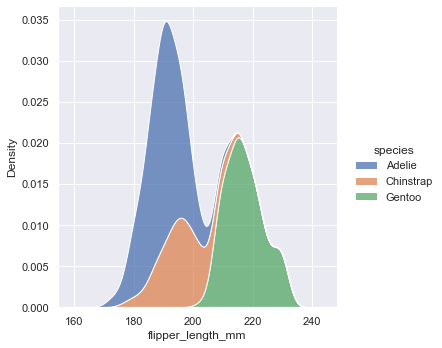

In [12]:
sb.displot(penguins,x="flipper_length_mm",hue="species",kind="kde",multiple="stack")

#### the stacked plot filled in the area between each curve by default. It is also possible to fill in the curves for single or layered densities, although the default alpha value (opacity) will be different, so that the individual densities are easier to resolve.

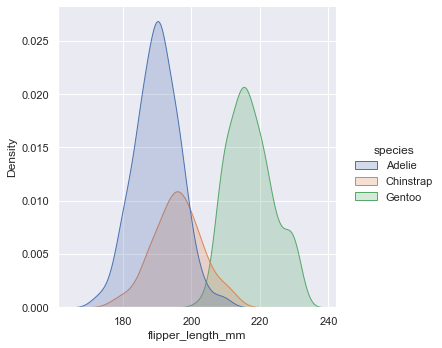

In [13]:
sb.displot(penguins,x="flipper_length_mm",hue="species",kind="kde",fill=True)

### Kernel density estimation pitfalls

##### KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded.
##### The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented. The important thing to keep in mind is that the KDE will always show you a smooth curve, even when the data themselves are not smooth.

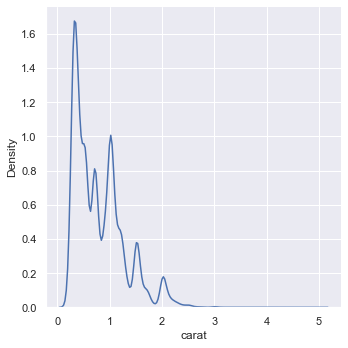

In [14]:
diamonds = sb.load_dataset("diamonds")
sb.displot(diamonds, x="carat", kind="kde")

#### While the KDE suggests that there are peaks around specific values, the histogram reveals a much more jagged distribution

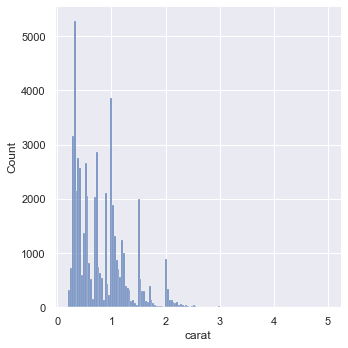

In [15]:
sb.displot(diamonds, x="carat")

# Merging the two approach

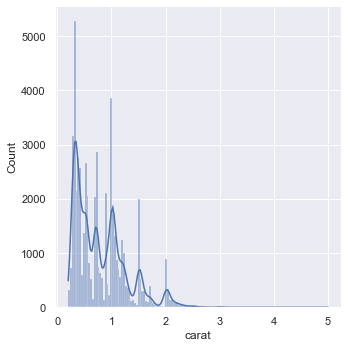

In [16]:
sb.displot(diamonds, x="carat", kde=True)

# Visualizing bivariate distributions

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analagous to a heatmap())

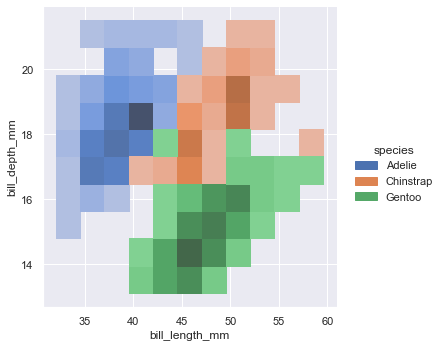

In [17]:
sb.displot(penguins,x="bill_length_mm",y="bill_depth_mm",hue="species")

a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the contours of the 2D density

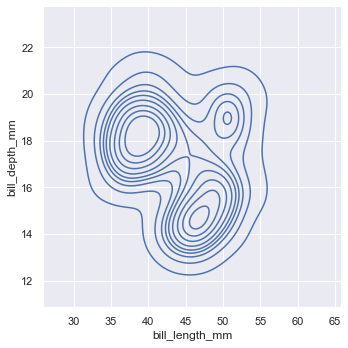

In [18]:
sb.displot(penguins,x="bill_length_mm",y="bill_depth_mm",kind="kde")

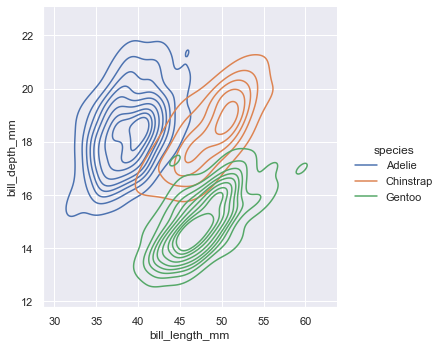

In [19]:
sb.displot(penguins,x="bill_length_mm",y="bill_depth_mm",kind="kde",hue="species")

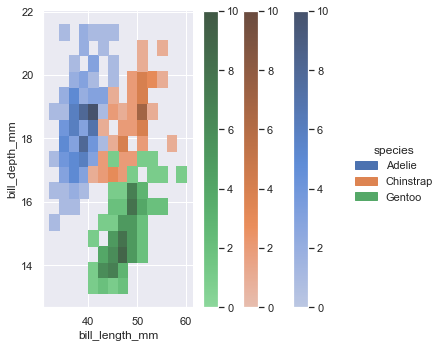

In [20]:
sb.displot(penguins,x="bill_length_mm",y="bill_depth_mm",hue="species",binwidth=(2,.5),cbar=True)

# Plotting joint and marginal distributions

# Coming soon with explaination and update
The pairplot() function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships

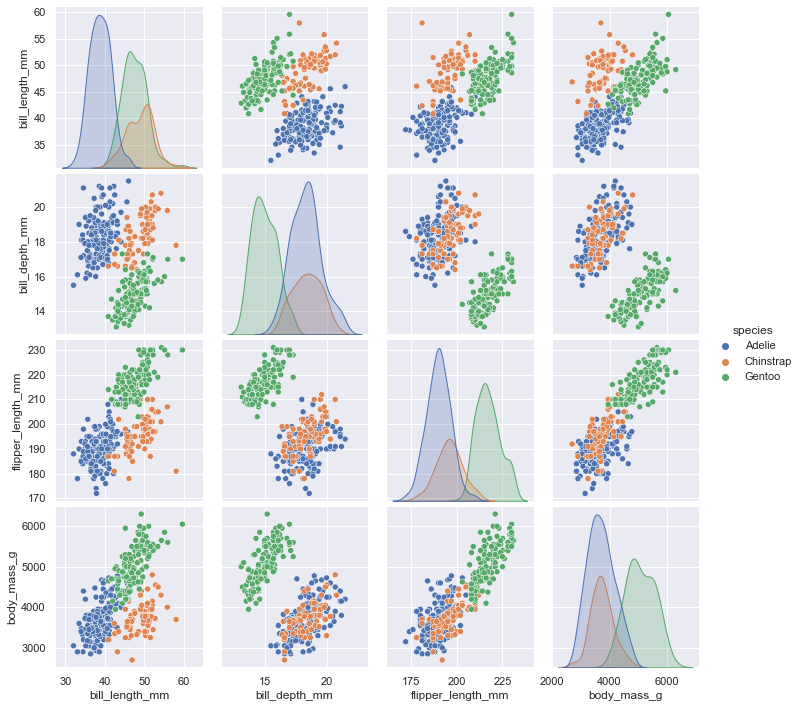

In [23]:
sb.pairplot(penguins,hue="species")